In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df=pd.read_csv(r"Flight_Booking.csv")

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 12)

In [6]:
df.size

3601836

In [7]:
df.dropna(inplace=True)

In [8]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# we are droping unnamed and fligth column because it wil not effect flight price because name of the flight belongs to air line 

In [11]:
df=df.drop(columns='Unnamed: 0')

In [12]:
df=df.drop(columns='flight')

In [13]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
for i in df:
    print(df[i].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64
class
Economy     206666
Business     93487
Name: count, dtype: int64
duration
2.17

# we will check for cardinality of the data 

because big number of variable in a column can effect our data 

In [16]:
for i in df:
    print(i,'contains',len(df[i].unique()),'labels')

airline contains 6 labels
source_city contains 6 labels
departure_time contains 6 labels
stops contains 3 labels
arrival_time contains 6 labels
destination_city contains 6 labels
class contains 2 labels
duration contains 476 labels
days_left contains 49 labels
price contains 12157 labels


here we can see there are not too much cardinality in any columns 

# now we are going to fetch the catagorical varieble first

In [17]:
cata=[]

for i in df.columns:
    if df[i].dtypes=='object':              #"O'
        cata.append(i)
print("total",len(cata),'chatagorical variable ')
print('name of the catagorical variables are:',cata)

total 7 chatagorical variable 
name of the catagorical variables are: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [18]:
df[cata].isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


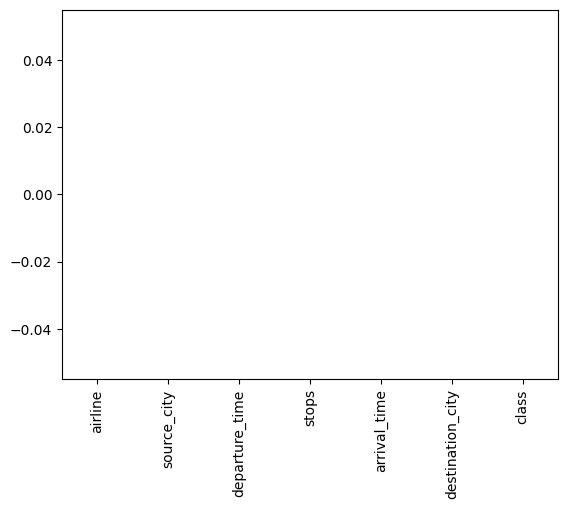

In [19]:
print(df[cata].isnull().sum().plot.bar())


# there is no missing value thats why it is shwoing no graph 

In [20]:
# it will show us the numeric data only
df.describe()
#df.describe(include="O") for objects only  


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# data visualization 

C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

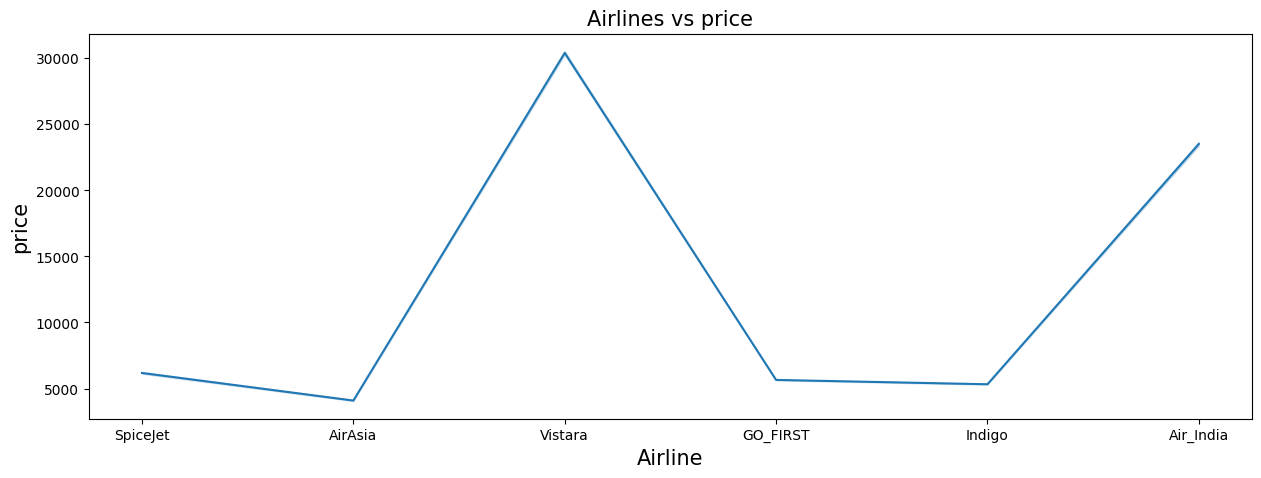

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df['airline'],y=df['price'])
plt.title('Airlines vs price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

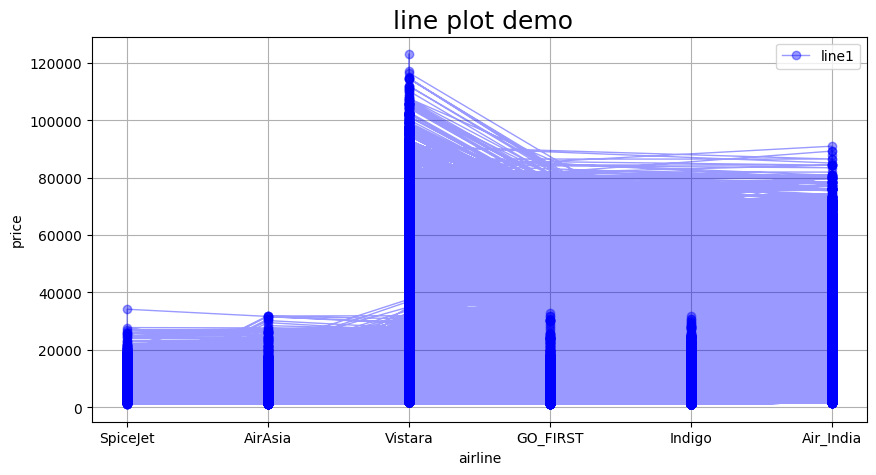

In [22]:

#definnig the dataset
x=df['airline']
y=df['price']

# changing the size of the graph
fig=plt.figure(figsize=(10,5))

# plotting the datapoints
plt.plot(x,y,linewidth = 1.0,linestyle= "-",color = 'b',alpha=0.4,marker='o')# alpha is opasity of line (shade of colour)

plt.title(" line plot demo",fontsize=18)#title
plt.xlabel("airline") #x  axis
plt.ylabel("price")
plt.legend(['line1'],loc='best') # legend at best position 
plt.grid(True)
plt.show()

 price range of the flight withrespect to airline

C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='airline', ylabel='price'>

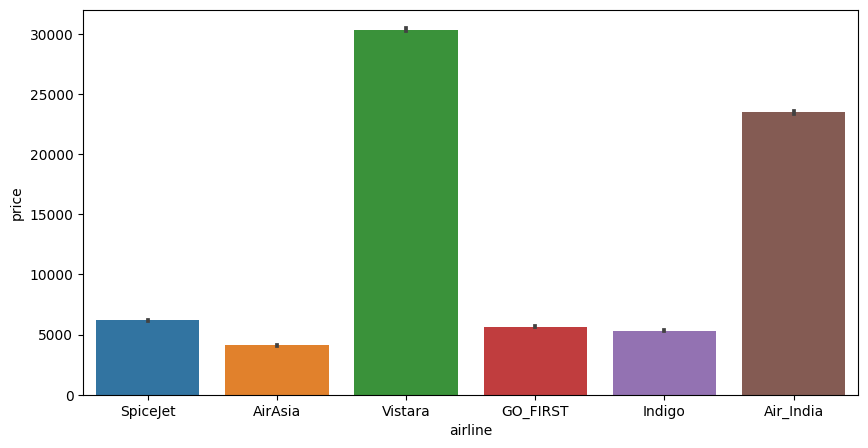

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)#x="z           

 we will find the avg price with respeect to airline 

In [24]:
df.groupby('airline')['price'].mean()
print('avg price of ',df.groupby('airline')['price'].mean())

avg price of  airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


we are going to find the maximum price of air line 

In [25]:
df.groupby('airline')['price'].max()

airline
AirAsia       31917
Air_India     90970
GO_FIRST      32803
Indigo        31952
SpiceJet      34158
Vistara      123071
Name: price, dtype: int64

we are going to find the min  price of air line

In [26]:
df.groupby('airline')['price'].min()

airline
AirAsia      1105
Air_India    1526
GO_FIRST     1105
Indigo       1105
SpiceJet     1106
Vistara      1714
Name: price, dtype: int64

#by this analysis we can see that price is variying on the basis of airline  



vistara has the maximum price 




the avg price of go first and indigo is same 




minimum price for  Airasia,GO_first,indigo are same 

# departure time and price 
now we are going to find the relation between the departure time 


here we are going to find the relationship of price with respect to the price thats why we are using the line chart 


C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

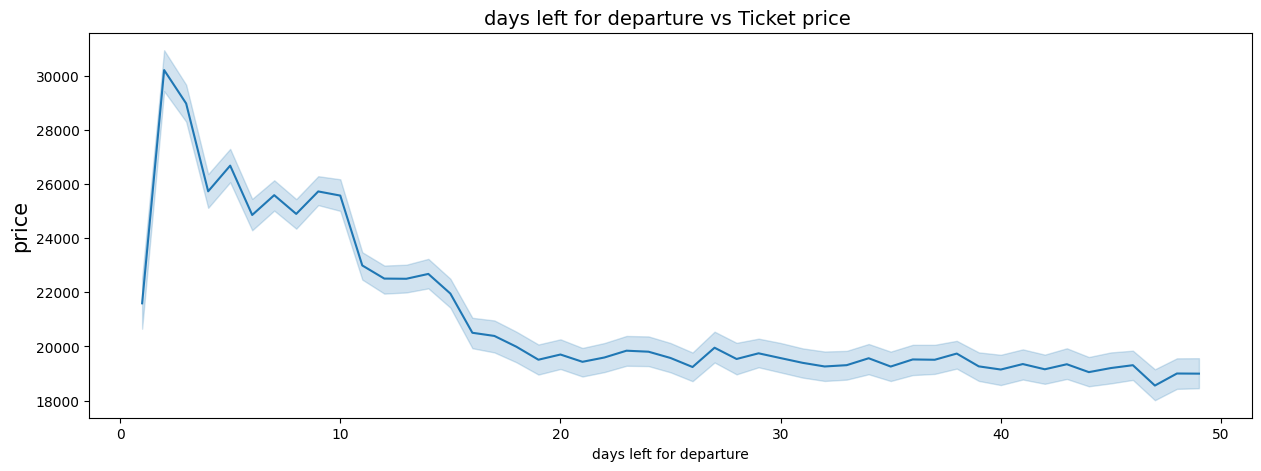

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df['days_left'],y=df['price'])
plt.title('days left for departure vs Ticket price ',fontsize=14)
plt.xlabel('days left for departure')
plt.ylabel('price',fontsize=15)

plt.show()

By analyzing this graph we can see that the price of the ticket is increase as the day left for the departure 

# range of price on the basis of airline and there respective class 

we can use pivot table to show the relationship between one column (price) on the basis of two other column(class,airline) 

we can also use the bar plot to show the relationship 

In [28]:
df.pivot_table(values='price',index='airline',columns='class',aggfunc=[min,max,'mean'])

C:\Users\banke\AppData\Local\Temp\ipykernel_12172\1973012616.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  df.pivot_table(values='price',index='airline',columns='class',aggfunc=[min,max,'mean'])
C:\Users\banke\AppData\Local\Temp\ipykernel_12172\1973012616.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  df.pivot_table(values='price',index='airline',columns='class',aggfunc=[min,max,'mean'])


min               max                   mean             
class     Business Economy  Business  Economy      Business      Economy
airline                                                                 
AirAsia        NaN  1105.0       NaN  31917.0           NaN  4091.072742
Air_India  12000.0  1526.0   90970.0  42349.0  47131.039212  7313.682169
GO_FIRST       NaN  1105.0       NaN  32803.0           NaN  5652.007595
Indigo         NaN  1105.0       NaN  31952.0           NaN  5324.216303
SpiceJet       NaN  1106.0       NaN  34158.0           NaN  6179.278881
Vistara    17604.0  1714.0  123071.0  37646.0  55477.027777  7806.943645

C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='class', ylabel='price'>

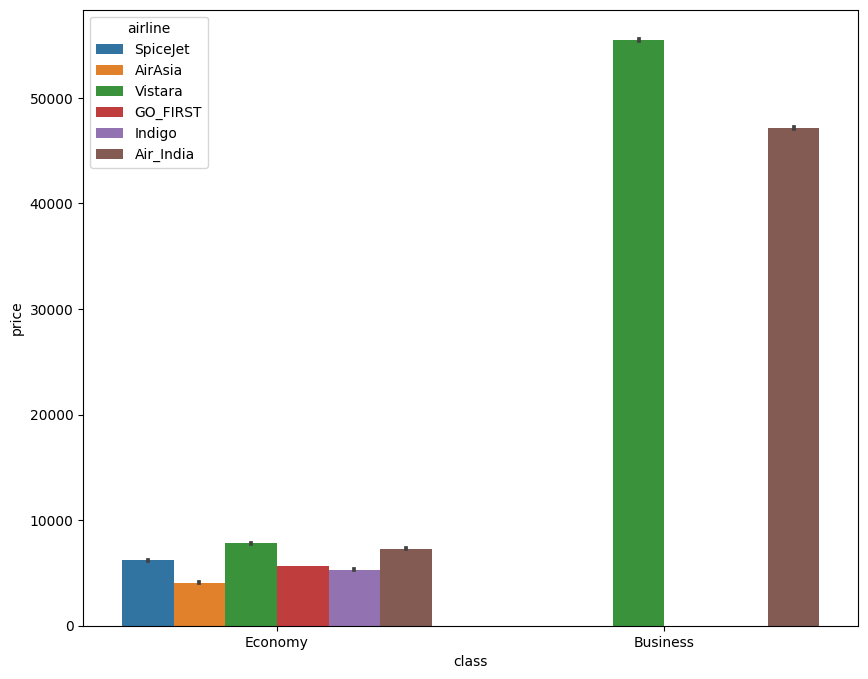

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x=df['class'],y=df['price'],hue=df['airline'])

#by these observations we can see that most number of business class is booked 

for vistara is also charging  max price for business class and Economy class

and can also say most of the Economy is also booked for vistara 

vistara is also ghaving  maximum price for Business class and Economy

and air asia is the cheapest for Economy class and not providing any business class facility 

and air india is the cheapest option for the Business class 


# price of flight wrt source and destination city acording to the days left 

C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

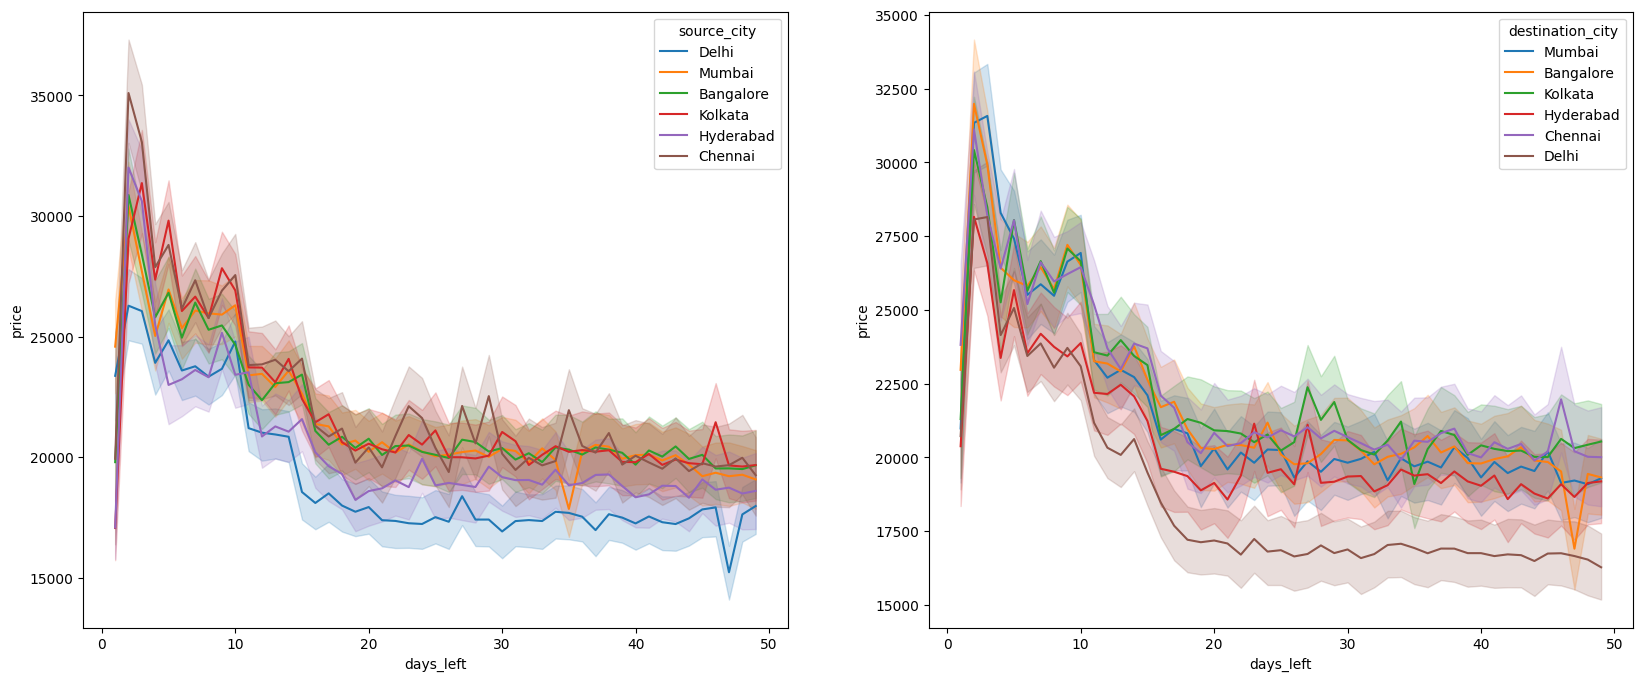

In [30]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['source_city'],data=df,ax=ax[0])
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['destination_city'],data=df,ax=ax[1])
plt.show()

#value count for catagorical variable with the help of visualization and pandas code also 

C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

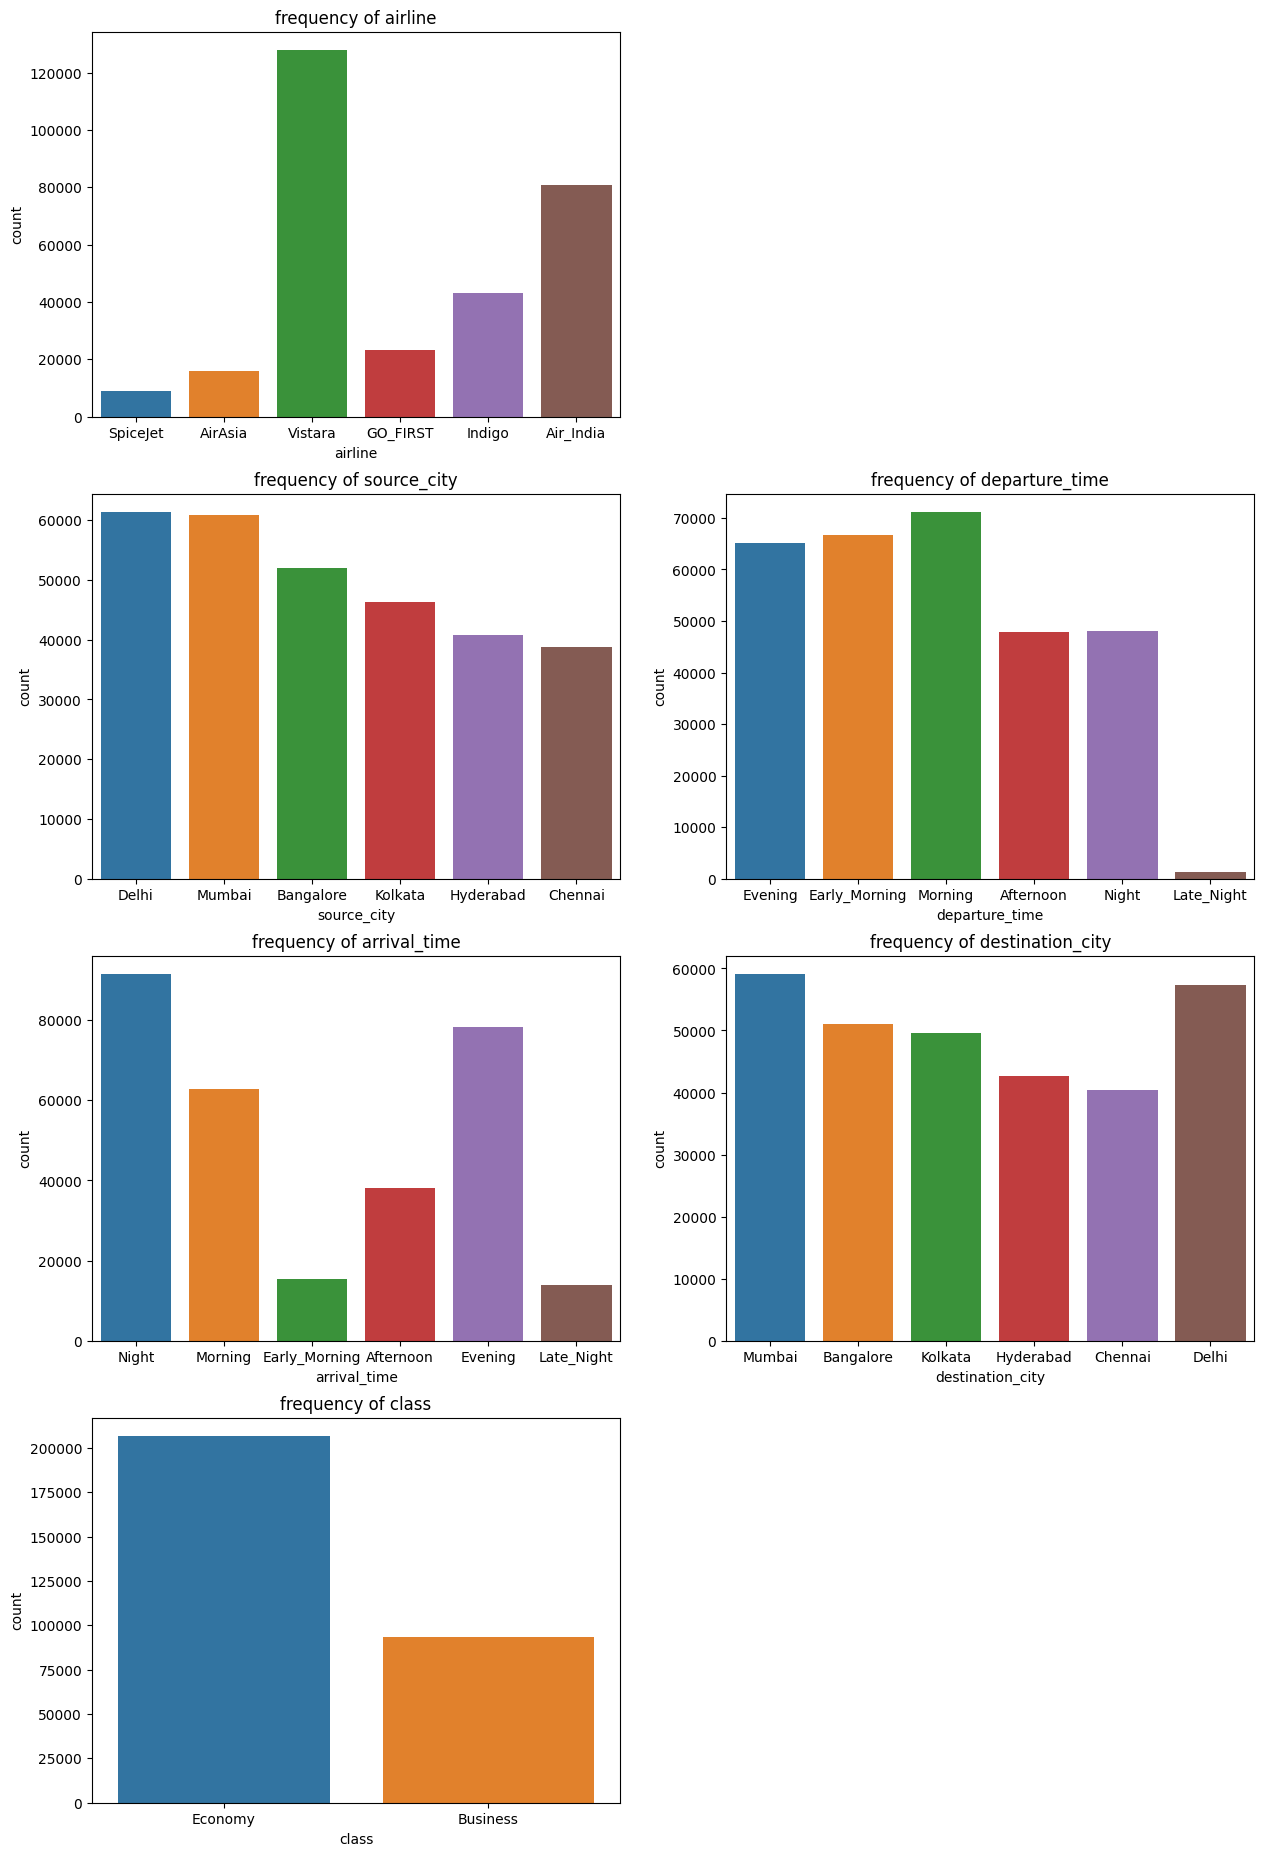

In [31]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('frequency of airline')



plt.subplot(4,2,3)
sns.countplot(x=df['source_city'],data=df)
plt.title('frequency of source_city')


plt.subplot(4,2,4)
sns.countplot(x=df['departure_time'],data=df)
plt.title('frequency of departure_time')


plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('frequency of arrival_time')


plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('frequency of destination_city')


plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('frequency of class')

plt.show()

# now we will do the lable encoding 

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [33]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


we will check for the outlairs 


<Axes: >

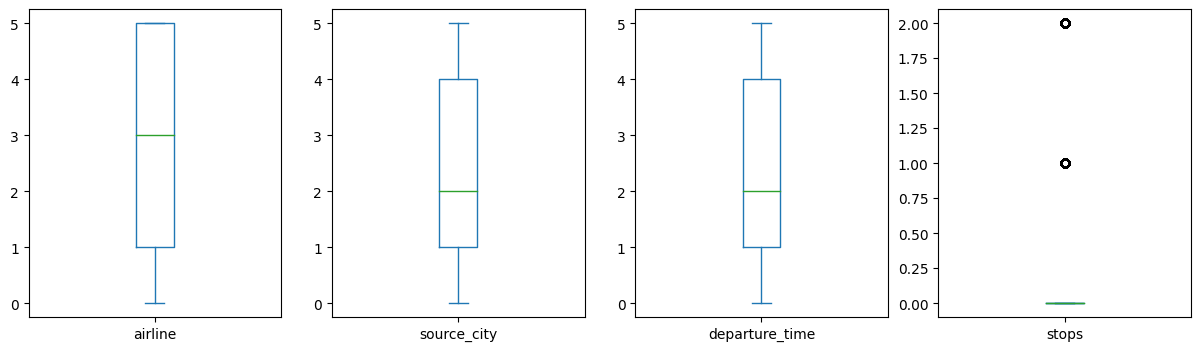

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
df.airline.plot(kind='box')

plt.subplot(1,4,2)
df.source_city.plot(kind='box')


plt.subplot(1,4,3)
df.departure_time.plot(kind='box')

plt.subplot(1,4,4)
df.stops.plot(kind='box')


<Axes: >

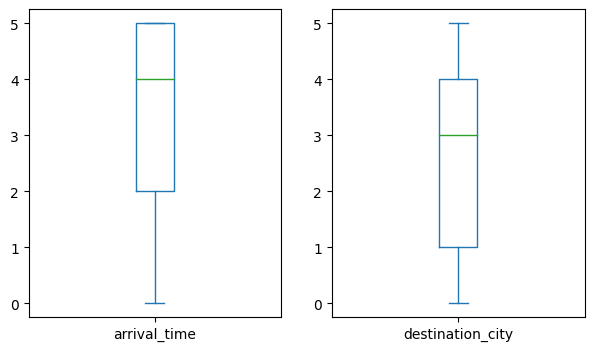

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
df.arrival_time.plot(kind='box')

plt.subplot(1,4,2)
df.destination_city.plot(kind='box')


<Axes: >

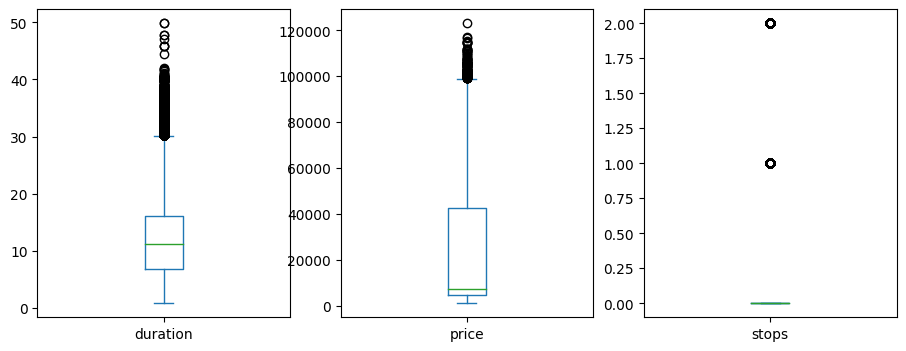

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
df.duration.plot(kind='box')

plt.subplot(1,4,2)
df.price.plot(kind='box')


plt.subplot(1,4,3)
df.stops.plot(kind='box')

In [37]:
df['class'].unique()


array([1, 0])

Now we can see that there are outlair in duration,price,stop columns

we will do the outlair treaatment for all the three coulmns 

In [38]:
# first we will find the Q3 (third quartile for  duration)
Q3=df.duration.quantile(0.75)
# now we will find the Q1 or first Quantile 
Q1=df.duration.quantile(0.25)
#now we will find the IQR (interqartile range )
IQR=Q3-Q1

# now we will try to find upper range or lower range 

upper_duration=Q3+1.5*IQR

# now we will find the lower range 
lower_duration=Q1-1.5*IQR

In [39]:
df=df[(df['duration']>lower_duration)&(df['duration']<= upper_duration)]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [40]:
# first we will find the Q3 (third quartile for  duration)
Q3=df.price.quantile(0.75)
# now we will find the Q1 or first Quantile 
Q1=df.price.quantile(0.25)
#now we will find the IQR (interqartile range )
IQR=Q3-Q1

# now we will try to find upper range or lower range 

upper_price=Q3+1.5*IQR

# now we will find the lower range 
lower_price=Q1-1.5*IQR

In [41]:
df=df[(df['price']<upper_price)&(df['price']>lower_price)]

In [42]:
df[df['duration']<upper_duration].count()

airline             297921
source_city         297921
departure_time      297921
stops               297921
arrival_time        297921
destination_city    297921
class               297921
duration            297921
days_left           297921
price               297921
dtype: int64

<Axes: >

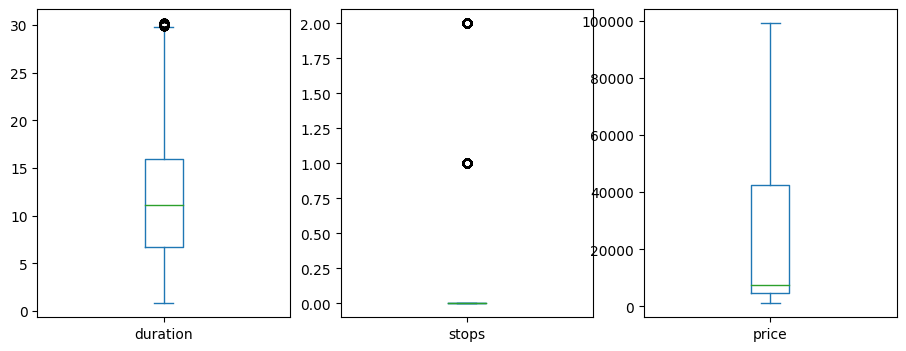

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
df.duration.plot(kind='box')

plt.subplot(1,4,2)
df.stops.plot(kind='box')


plt.subplot(1,4,3)
df.price.plot(kind='box')

In [44]:
x=df.drop(columns=['price'],axis=1)
y=df['price']

In [45]:
y=df['price']
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 297921, dtype: int64

# Feature scaling 

# check for correlation between the variables 

First we will use heat MAP

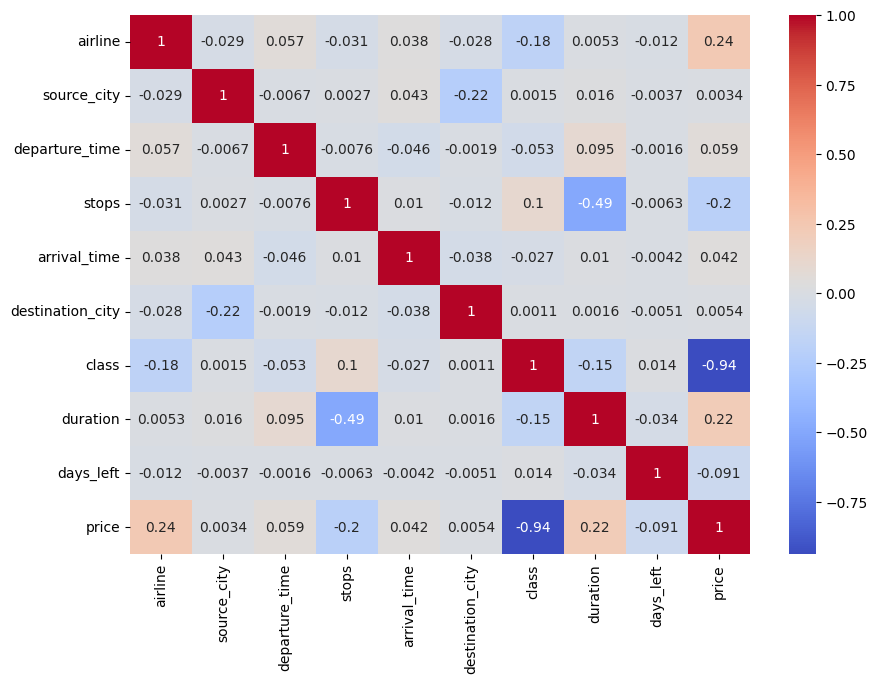

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

with the help of heat map we can see that airline column and and flight column is higly coreelated and we can not 
afford multi colinearity in case of reggression 

so now we will check which column we should remove flight or airline  

# now we will check for VIF
for feature scaling as we know if for a feature our VIF is >= 0.5 that means other feature are related to target variable and it will be showing some multicolinearity also thats why we will remove our that feature where value of vif is >=0.5

formula for vif is =1/(1-R^2)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col=[]
for i in df.columns:
    if((df[i].dtypes !='object') & (i !='price')):
        col.append(i)

X=df[col]
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
7,duration,4.32
8,days_left,4.00
4,arrival_time,3.69
0,airline,3.41
1,source_city,2.95
5,destination_city,2.89
6,class,2.84
2,departure_time,2.80
3,stops,1.45


**important feature with the help of extra tree rgressor**


In [49]:

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[0.01085315 0.01014438 0.00498189 0.03572685 0.00536863 0.01011985
 0.88211341 0.02285639 0.01783546]


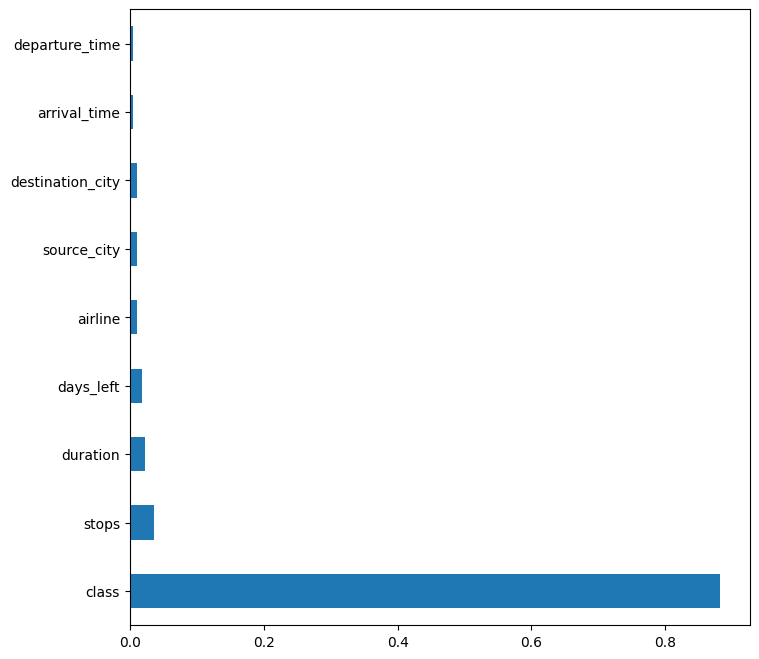

In [51]:
# assuming you have already fitted the selection model and obtained the feature importances
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)

# plot the important feature 
plt.figure(figsize=(8,8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


**train test split**

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


**standardization** is feature scaling in which we make the magnitude of our data unit less 

for this we use z score formula 

z=(x-mu)/sigma

and condition for standardization is that we make the mu=0 and sigm=1

In [53]:
# standardization of the data 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# model traning
*** now we will fit our model in x train and y train then we will train with the help of this  ******

In [125]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

**prediction** 

In [126]:
y_pred=lr.predict(x_test)

In [127]:
residual=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actul value",'predictedvalue'])
residual

,Actul value,predictedvalue
0,4170.0,7965.264744
1,15105.0,6704.065220
2,2903.0,-1762.214713
3,4079.0,4801.367310
4,5388.0,8264.300493
...,...,...
89304,3393.0,1076.909469
89305,3729.0,5491.922369
89306,17736.0,10047.742765
89307,5943.0,4896.341383


# performance matrices

#
calculation score of **r2score** 

In [128]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9070445836806337

# adjR^2*
calculation of adj**adjR^2** == 1-{(1-R^2)*(n-1)/(n-1-k)}

where n= number of rows 

k= number of independent variable 

In [129]:
x_test.shape

(89309, 9)

In [130]:
1-((1-r2)*(89377-1)/(89377-1-9))

0.9070352222972721

**MAE**

In [131]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4617.658399129255

Mean absolute percentage error 

In [132]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.44185317573441

**MSE**

In [133]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error


47838150.1915958

**RMSE= sqrt(MSE)**

In [134]:

root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

6916.512863545892

**OLS(ordinary least square method)** second way to find R^2 and ADJ R^2
with help of the OLS we can find the **P** value also feature selection 

more the R^2 and adj R^2 more our model is relaible 

In [135]:
import statsmodels.api as sm 
results=sm.OLS(y_test,y_pred).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          1.682e+06
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                        0.00
Time:                        11:57:38   Log-Likelihood:                     -9.1636e+05
No. Observations:               89309   AIC:                                  1.833e+06
Df Residuals:                   89308   BIC:                                  1.833e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0022      0.001   1296.915      0.000       1.001       1.004
==============================================================================
Omnibus:                     9891.210   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76369.727
Skew:                           0.248   Prob(JB):                         0.00
Kurtosis:                       7.503   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now we will check for over fitting and under fitting 

In [138]:
y_train_pred=lr.predict(x_train)

In [139]:
import statsmodels.api as sm 
results=sm.OLS(y_train,y_train_pred).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          3.877e+06
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                        0.00
Time:                        11:57:41   Log-Likelihood:                     -2.1396e+06
No. Observations:              208386   AIC:                                  4.279e+06
Df Residuals:                  208385   BIC:                                  4.279e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.001   1969.128      0.000       0.999       1.001
==============================================================================
Omnibus:                    23448.751   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185333.838
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                       7.593   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_train,y_train_pred)
mean_abs_error

4639.554695756232

In [141]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train,y_train_pred)

0.44014699881347674

 we can see that there is not very much difference between 
mse_train and mse_test thats why there is no need of applying 
any other solutions like l1,and l2 regularization 

# assumptions 
1: our errors are following normal distribution or not 

2: check for hetroscadasity 

3: multi colinearity 

4: no auto correlation of residuals 

1: our errors are following normal distribution or not

C:\Users\banke\AppData\Local\Temp\ipykernel_10916\3754758995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1

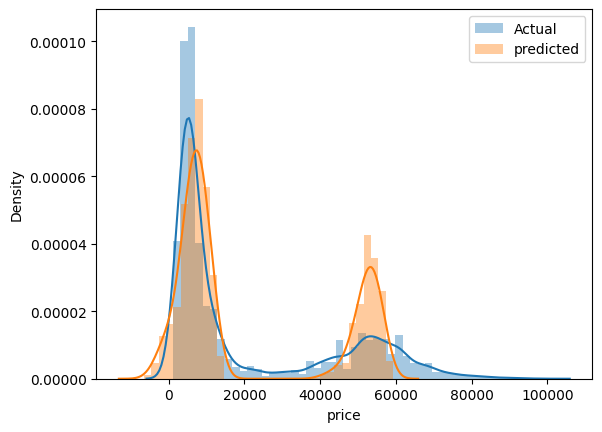

In [142]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predicted')
plt.legend()
plt.show()

Now by analysing that graph we can say that our erros are follwing normal distribution

In [143]:
residual=y_test-y_pred
residual


3679     -3795.264744
80500     8400.934780
24921     4665.214713
202483    -722.367310
184689   -2876.300493
             ...     
109560    2316.090531
154696   -1762.922369
170879    7688.257235
44398     1046.658617
179515   -3232.652712
Name: price, Length: 89309, dtype: float64

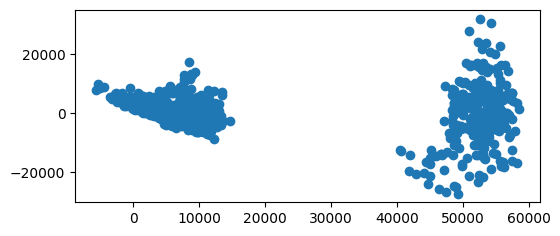

In [144]:
fig,ax=plt.subplots(figsize=(6,2.5))
#_=ax.scatter(y_pred,residual)
_=ax.scatter(pd.DataFrame(y_pred).head(1000),residual.head(1000))

we can see that there is no relation between residual and our predicted price of test data set not  following  heteroscedasticity it means it is following homoscedasticity 

no auto coreelation in residuals 

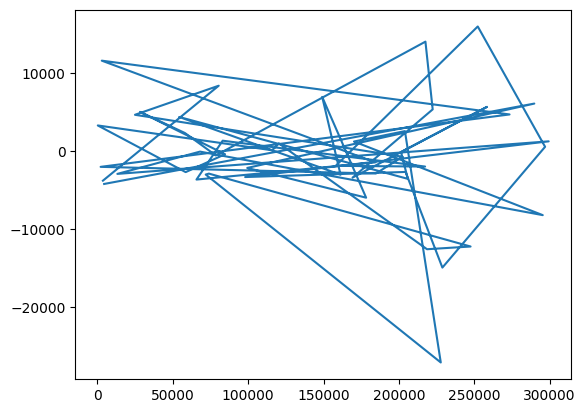

In [145]:
#plt.plot(residual)
plt.plot(residual.head(50))

# Decision Tree Regegressor 

model fitting 

In [146]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

mdel predict

In [147]:
y_pred=dt.predict(x_test)

R2 score 

In [148]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9776161074797761

adj R2

In [149]:
1-((1-r2)*(89377-1)/(89377-1-9))

0.977613853235674

MAE

In [150]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1165.5718852523262

MAPE

In [151]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.07695043419873607

MSE



In [152]:

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)

mean_sq_error

11519544.042232586

RMSE

In [153]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3394.045380108019

# asumptions 

C:\Users\banke\AppData\Local\Temp\ipykernel_10916\3754758995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\banke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1

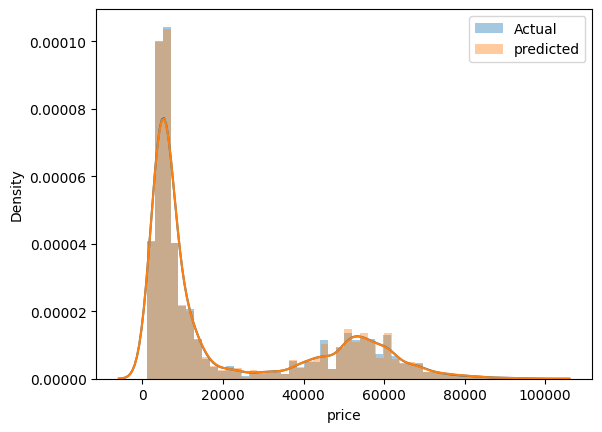

In [154]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predicted')
plt.legend()
plt.show()

In [155]:
residual=y_test-y_pred
residual


3679        339.0
80500         0.0
24921       421.0
202483     1720.0
184689        0.0
           ...   
109560      670.0
154696        0.0
170879    11781.0
44398         0.0
179515        0.0
Name: price, Length: 89309, dtype: float64

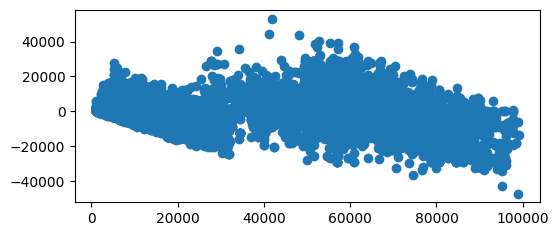

In [156]:
fig,ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(y_pred,residual)
#_=ax.scatter(pd.DataFrame(y_pred).head(1000),residual.head(1000))

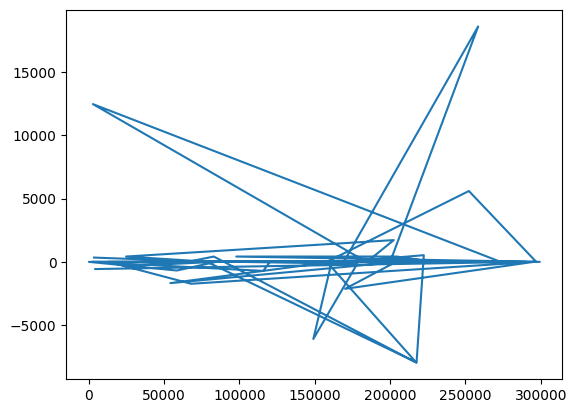

In [157]:
#plt.plot(residual)
plt.plot(residual.head(50))

# check for under fitting and over fitting 

In [158]:
#for that we will use the OLS method to calculate r2 and adj r2

y_train_pred=dt.predict(x_train)


In [159]:
r2_score(y_train,y_train_pred)

0.9993538734413873

In [160]:
MAE=metrics.mean_absolute_error(y_train,y_train_pred)
MAE

51.93071991400574

In [161]:
MSE=metrics.mean_squared_error(y_train,y_train_pred)
MSE

332152.7918358239

In [162]:
MSE=metrics.mean_squared_error(y_train,y_train_pred)
MSE

332152.7918358239

In [163]:
RMSE=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
RMSE

576.326983435466

# Random Forest REgressor 

In [164]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)


# performance matrics 

In [165]:
r2_score(y_test,y_pred)


0.985966715152285

MAE

In [166]:
MAE=metrics.mean_absolute_error(y_test,y_pred)
MAE

1087.1191809766722

MAPE

In [167]:
MAPE=metrics.mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.07233832008568572

MSE

In [168]:
MSE=metrics.mean_squared_error(y_test,y_pred)
MSE

7222025.5129616875

RMSE

In [169]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

2687.382651012261

# assumptions 

In [ ]:
# error is folllowing normal distribution or not 
sns.distplot(y_test,label='ACTUAL VALUE')
sns.distplot(y_pred,label='predicted value')
plt.legend()
plt.show()

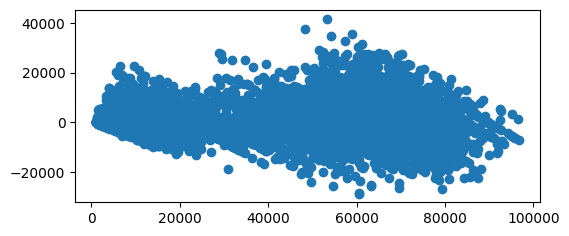

In [171]:
# it is following  homoscadasticity or hetroscadasticity 
residual=y_test-y_pred
residual
fig,ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(y_pred,residual)
#_=ax.scatter(pd.DataFrame(y_pred).head(1000),residual.head(1000))

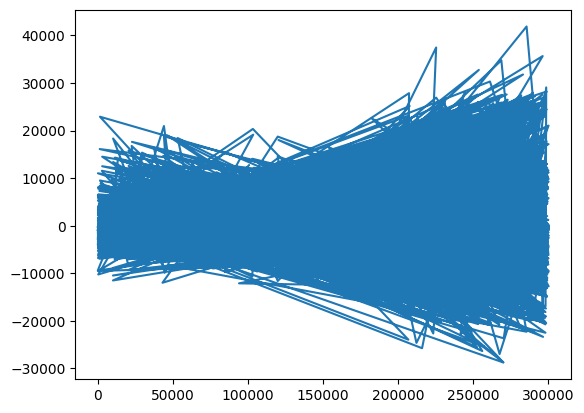

In [172]:
# no autocorrelation 
plt.plot(residual)

By analysing these graphs of assumption our we can say there is no issues with our modle 

# we will check for overfitting and underfitting 

In [173]:
y_train_pred=rfr.predict(x_train)

In [174]:
MAE=metrics.mean_absolute_error(y_train,y_train_pred)
MAE

427.9606923718307

In [175]:
MSE=metrics.mean_squared_error(y_train,y_train_pred)
MSE

1268227.145176846

In [ ]:
r2_score(y_train,y_train_pred)